In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('Data/weight_height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
females = df.loc[df['Gender']=='Female'].copy()

data = females['Height']

In [7]:
low_end = 55.0
high_end = 56.0

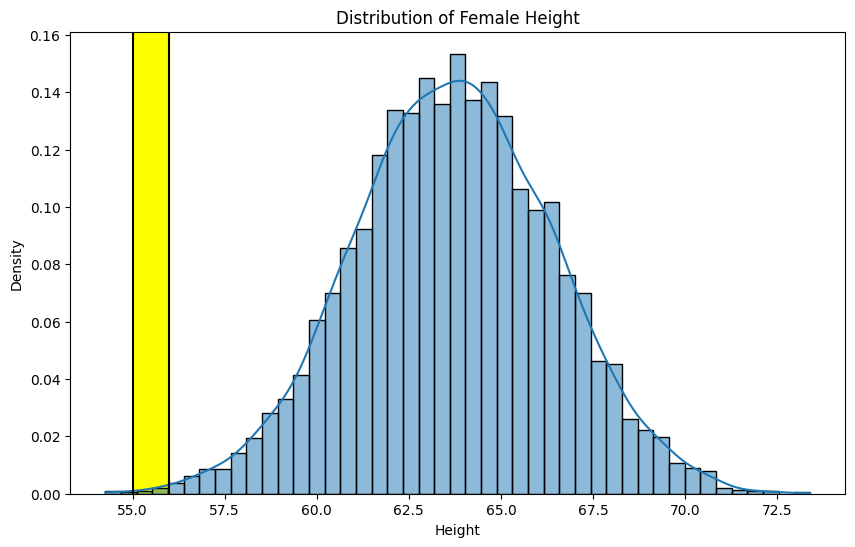

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [9]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [10]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [11]:
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

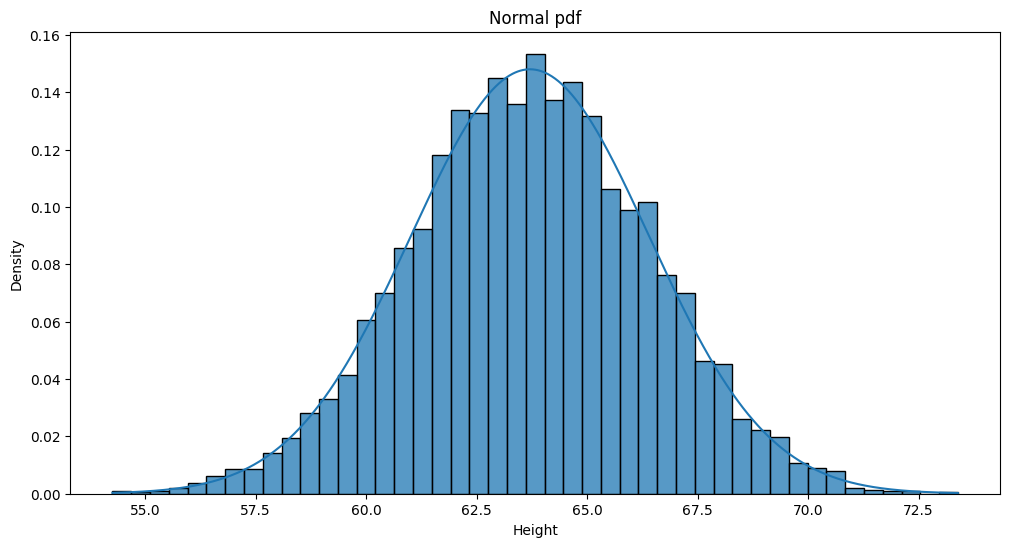

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

In [13]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

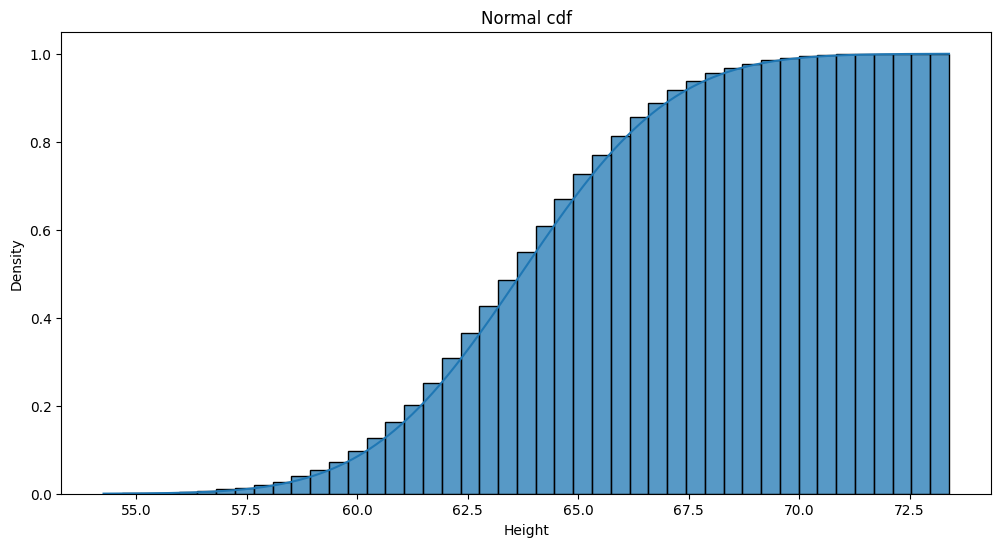

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

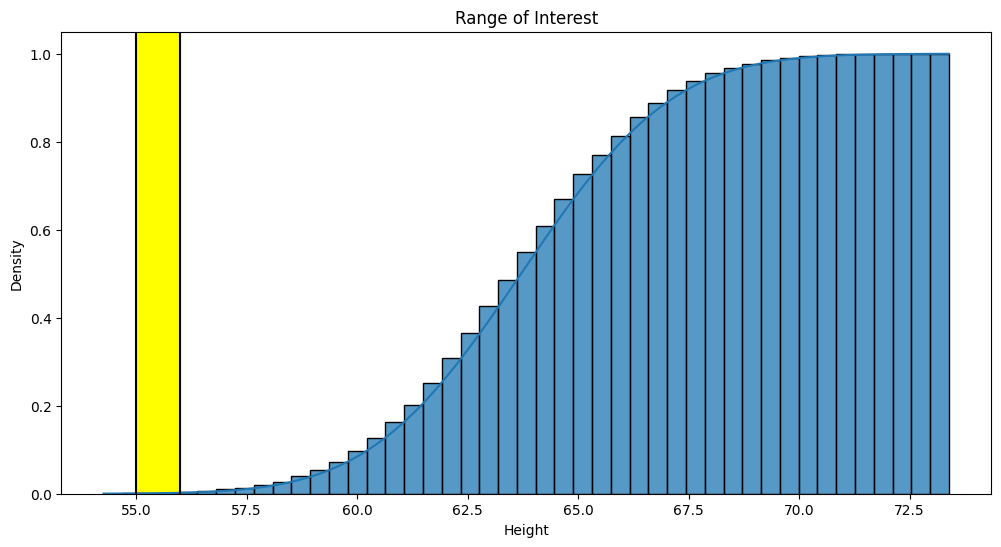

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest'); 

In [17]:
prob = stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

print(f'The overall probability of a female being between 55 and 56 in tall is {round(prob * 100,2)}%')

The overall probability of a female being between 55 and 56 in tall is 0.15%


In [18]:
prob_60 = stats.norm.cdf(60, loc=mean, scale=std)

print(f'The overall probability of a female being less than 60 in tall is {round(prob_60 * 100,2)}%')

The overall probability of a female being less than 60 in tall is 8.45%


In [19]:
prob_mean = 1-stats.norm.cdf(mean, loc=mean, scale=std)

print(f'The overall probability of a female being less than the mean is {round(prob_mean * 100,2)}%')

The overall probability of a female being less than the mean is 50.0%


### Since we have normalized data for height, our median & mean are in the center of our data, meaning it is a 50% probability for a value to fall above or below the mean